# The Influence of SST on Midlatitude Cyclones

There are many factors that can influence the the life cycle of a midlatitude cyclone. For cyclones that form and track along coastal regions of the southern and eastern US, sea surface temperatures (SSTs) can have a profound impact on the strength and speed of intensification of a given cyclone. In order to begin to understand the relationship we'll want to look at data that represent both the atmospheric strength of a cyclone with some information about ocean conditions. Where we have warmer SSTs there is greater capacity for moisture just above the ocean surface, which in turn can lead to greater latent heat release. It's the latent heat release that can strongly modify the environment to amplify atmospheric processes and thus produce a deeper (stronger) midlatitude cyclone in a very short amount of time.

Let's investigate a case to determine whether SSTs appear to play a major role in the life cycle of a midlatitude cyclone. 

Case: March 2023 Nor'Easter
Dates: 11-15 March 2023

Main Impacts: Heavy Snowfall, High Winds, Blizzard Conditions

States Impacted: New York, Massechusettes

Background Resource Information: https://abcnews.go.com/US/noreaster-bring-multiple-days-rain-snow-95-corridor/story?id=97830976

## Atmospheric Data

There are any number of different datasets that can be used to 

Data Source: https://rda.ucar.edu/thredds/catalog/catalog_ds084.1.html

In [18]:
from datetime import datetime

from metpy.units import units
import xarray as xr

# Specify our date/time of product desired
date = datetime(2023, 3, 11, 12)

ds = xr.open_dataset('https://rda.ucar.edu/thredds/dodsC/files/g/ds084.1/'
                     f'{date:%Y}/{date:%Y%m%d}/gfs.0p25.{date:%Y%m%d%H}.f000.grib2')

# Subset data to be just over the CONUS
ds = ds.sel(lat=slice(80, 10), lon=slice(360-145, 360-40))

## Ocean Data

Data Source: https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21NrtAgg.html

In [20]:
ds_sst = xr.open_dataset('https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21NrtAgg')

ds_sst = ds_sst.metpy.sel(time=date, method='nearest').sel(latitude=slice(10, 80), longitude=slice(360-145, 360-40))

/Users/kgoebber/miniconda3/envs/main/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/kgoebber/miniconda3/envs/main/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


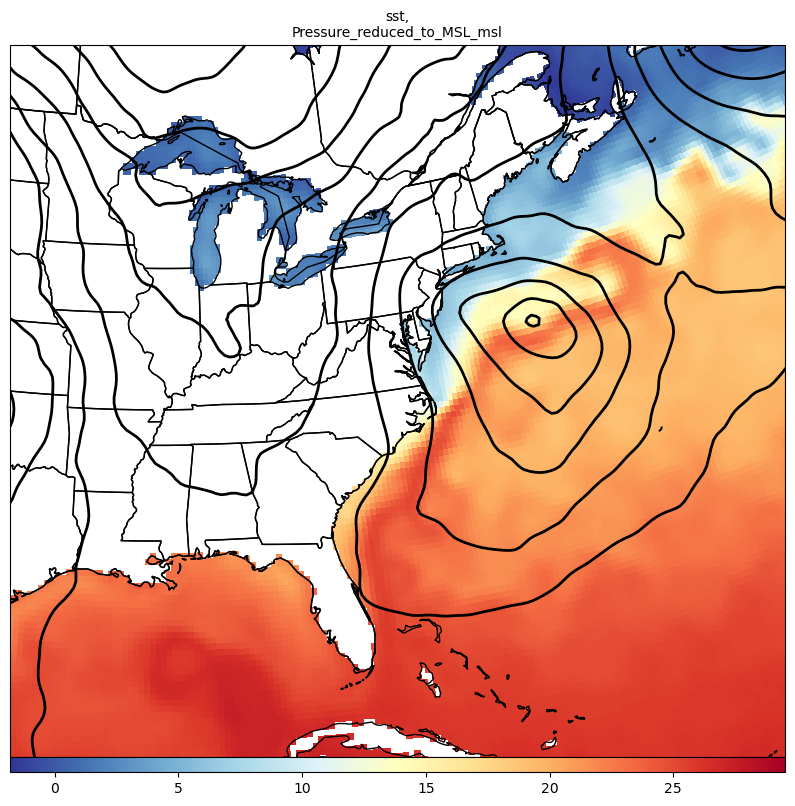

In [39]:
from metpy.plots import declarative
import numpy as np

sst = declarative.RasterPlot()
sst.data = ds_sst
sst.field = 'sst'
sst.colormap = 'RdYlBu_r'
sst.colorbar = 'horizontal'

mslp = declarative.ContourPlot()
mslp.data = ds
mslp.field = 'Pressure_reduced_to_MSL_msl'
mslp.time = date
mslp.contours = range(0, 2000, 4)
mslp.plot_units = 'hPa'
mslp.smooth_field = 3

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'area'
panel.area = 'ehlf'
panel.layers = ['coastline', 'borders', 'states']
panel.plots = [sst, mslp]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (10, 12)
pc.panels = [panel]

pc.show()

/Users/kgoebber/miniconda3/envs/main/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/kgoebber/miniconda3/envs/main/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


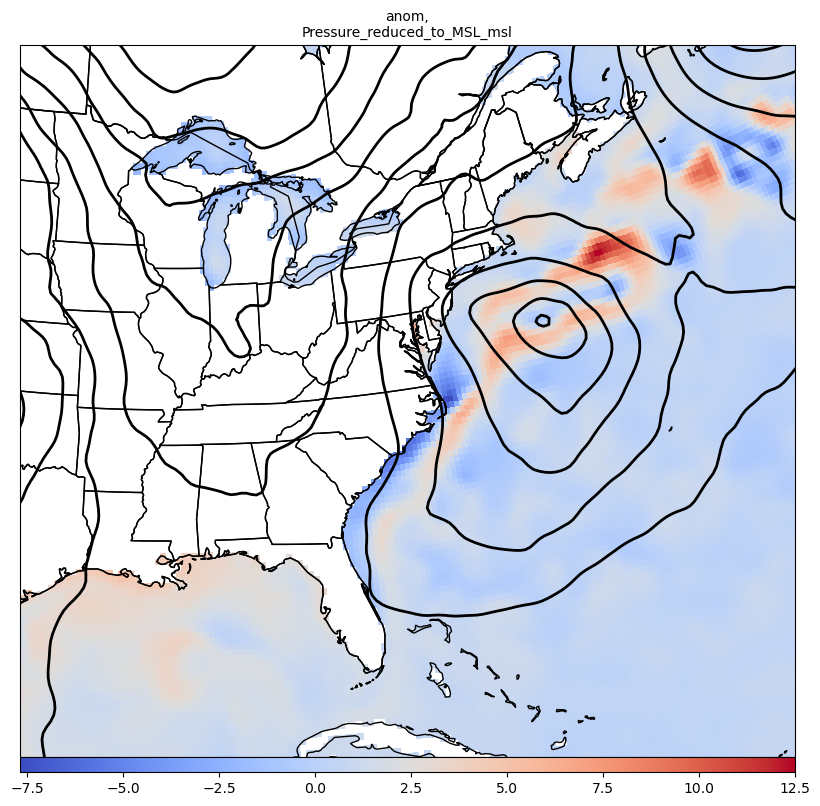

In [40]:
sst = declarative.RasterPlot()
sst.data = ds_sst
sst.field = 'anom'
sst.colormap = 'coolwarm'
sst.colorbar = 'horizontal'

mslp = declarative.ContourPlot()
mslp.data = ds
mslp.field = 'Pressure_reduced_to_MSL_msl'
mslp.time = date
mslp.contours = range(0, 2000, 4)
mslp.plot_units = 'hPa'
mslp.smooth_field = 3

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'area'
panel.area = 'ehlf'
panel.layers = ['coastline', 'borders', 'states']
panel.plots = [sst, mslp]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (10, 12)
pc.panels = [panel]

pc.show()